# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Part 3: EDA + Preliminary Analysis

## Overview

Begin quantitatively describing and visualizing your data. With rich datasets, EDA can go down an endless number of roads. Maintain perspective on your goals and scope your EDA accordingly.

Managing your own time is a critical skill in analysis projects. Keep notes on your approach, results, setbacks, and findings! These will form the basis of your "progress report" to us for Part 3, as you meet with your instructors to discuss how things are going and what to do next.

**Goal**: A brief report that describes your EDA and analysis so far, as well as your concrete next steps.

---

## Requirements

1. Create a "progress report" that documents:
   - Your approach to exploratory data analysis
   - Your initial results
   - Any roadblocks, setbacks, or surprises

2. Perform initial descriptive and visual analysis of your data.
   - Identify outliers
   - Summarize risks and limitations

3. Discuss your proposed next steps
   - Describe how your EDA will inform your modeling decisions
   - What are three concrete actions you need to take next?


#### BONUS

4. Visualize your EDA and approach using at least **two or more** of the data visualization methods we've covered in class.
5. Create a blog post of at least 500 words explaining your EDA so far, including your results, setbacks, and lessons learned. Link to this in your notebook.

---

## Deliverable Format & Submission

- Format: Jupyter Notebook

---

## Suggested Ways to Get Started

- Document **everything** as you go! This will give you valuable material to pull into your report - and will paint a more accurate picture than trying to summarize afterward :)
- Be candid! This is not a race, but a chance to get valuable feedback. Be honest about what techniques have worked, what steps have taken you down the wrong turns, and what blockers you've run into.

---

## Useful Resources

- [Describing data visually](http://www.statisticsviews.com/details/feature/6314441/Visualising-Statistics-The-importance-of-seeing-not-just-describing-data.html)
- [Real world data science workflows often contain setbacks](https://guerrilla-analytics.net/2015/02/20/data-science-workflows-a-reality-check/)

---

## Project Feedback + Evaluation

[Attached here is a complete rubric for this project.](./capstone-part-03-rubric.md)

Your instructors will score each of your technical requirements using the scale below:

Score  | Expectations
--- | ---
**0** | _Incomplete._
**1** | _Does not meet expectations._
**2** | _Meets expectations, good job!_


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import requests
import bs4
from bs4 import BeautifulSoup
from selenium import webdriver

import re
import time
import json

In [2]:
pets_df = pd.read_csv('/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-capstone/data/pets4homes_data_cleaned',
                     index_col = 'Unnamed: 0')

In [3]:
pets_df_dictionary = {
    'title' : 'The title of the listing',
    'price' : 'The price of the listed pet',
    'url' : 'The URL of the listing',
    'phone_verified' : "Whether the seller's profile has been verified by phone",
    'email_verified' : "Whether the seller's profile has been verified by email",
    'facebook_verified' : "Whether the seller's profile has been verified by Facebook",
    'google_verified' : "Whether the seller's profile has been verified by Google",
    'n_images' : 'The number of images included in the listing',
    'category' : 'The type of animal',
    'advert_id' : "The listing's unique ID",
    'advert_location' : "The location of the seller",
    'advertiser_type' : 'The type of seller',
    'breed' : 'The breed of the pet(s) being sold',
    'pet_age' : 'The age of the pet(s) being sold',
    'pet_colour' : 'The colour of the pet(s) being sold',
    'pet_sex' : 'The sex of the pet(s) being sold',
    'description' : 'The listing description provided by the seller',
    'health_checked' : 'Whether the pets(s) have been health checked',
    'microchipped' : 'Whether the pets(s) have been microchipped',
    'neutered' : "Whether the pet(s) have been neutered",
    'vaccinated' : "Whether the pet(s) have been vaccinated",
    'worm_treated' : "Whether the pet(s) have been worm treated",
    'registered' : "Whether the pet(s) are registered with a breeders or owners club/society",
    'original_breeder' : 'Whether the seller is the original breeder of the pet',
    'viewable_with_mother' : "Whether the pet is viewable with it's mother",
    'category_1' : 'The primary category of a horse', 
    'category_2' : 'The secondary category of a horse',
    'height' : 'The height of a horse (measured in hands)',
    'origin' : 'The origin of a horse',
    'jumping_horse' : 'Whether a horse does show jumping',
    'dressage_horse' : 'Wether a horse does dressage',
    'seller_n_adverts' : 'The number of adverts that seller had at the time of data collection',
    'pets_age_in_days' : "The age of the pet(s), measured in days",
    'males_in_litter' : "The number of male pets in the litter",
    'females_in_litter' : "The number of female pets in the litter"}

I will begin by checking the data types of each of the columns 

In [4]:
pets_df.dtypes[(pets_df.dtypes != int) & (pets_df.dtypes != float)]

title                   object
url                     object
category                object
advert_id               object
advert_location         object
advertiser_type         object
breed                   object
pet_age                 object
pet_colour              object
pet_sex                 object
description             object
health_checked          object
microchipped            object
neutered                object
vaccinated              object
worm_treated            object
registered              object
original_breeder        object
viewable_with_mother    object
category_1              object
category_2              object
height                  object
origin                  object
jumping_horse           object
dressage_horse          object
males_in_litter         object
females_in_litter       object
dtype: object

In [5]:
continuous_vars = ['price', 
                   'n_images', 
                   'seller_n_adverts', 
                   'pets_age_in_days',
                   'males_in_litter',
                   'females_in_litter']

# variables currently encoded as binary
binary_vars = ['phone_verified', 
               'email_verified', 
               'facebook_verified', 
               'google_verified']

# 'binary' variables with 'not applicable' as a level, which needs to be set aside 
# for EDA 
binary_vars_with_NAs = ['microchipped',
                        'neutered',
                        'vaccinated',
                        'worm_treated',
                        'registerd',
                        'original_breeder',
                        'viewable_with_mother',
                        'jumping_horse',
                        'dressage_horse']


catergorical_vars_true = ['category',
                          'advert_location',
                          'advertiser_type',
                          'breed',
                          'pet_colour',
                          'breed', # 3 levels due to 'mixed'
                          'category_1',
                          'category_2']

text_vars = ['title',
            'description']

id_vars = ['url',
           'advert_id']

## Continuous variables

In [6]:
pets_df[continuous_vars].dtypes

price                float64
n_images               int64
seller_n_adverts       int64
pets_age_in_days     float64
males_in_litter       object
females_in_litter     object
dtype: object

In [7]:
# fe/males in litter are continuous, but only apply to dogs and cats.
# I'll need to move the 'Not applicable' and 'Unlisted' values to other columns to include these in 
# the continuous variable analysis

# creating new columns
    # N/A
pets_df['males_in_litter_NA'] = 0
pets_df['females_in_litter_NA'] = 0
    # Unlisted
pets_df['males_in_litter_UNLISTED'] = 0
pets_df['females_in_litter_UNLISTED'] = 0


# transfering over values
    # N/A
pets_df.loc[pets_df['males_in_litter'] == 'Not applicable','males_in_litter_NA'] = 1
pets_df.loc[pets_df['females_in_litter'] == 'Not applicable','females_in_litter_NA'] = 1
    # Unlisted
pets_df.loc[pets_df['males_in_litter'] == 'Unlisted','males_in_litter_UNLISTED'] = 1
pets_df.loc[pets_df['females_in_litter'] == 'Unlisted','females_in_litter_UNLISTED'] = 1


# adding new cols to binary_vars
binary_vars.append('males_in_litter_NA')
binary_vars.append('females_in_litter_NA')
binary_vars.append('males_in_litter_UNLISTED')
binary_vars.append('females_in_litter_UNLISTED')

# changing original values to 0
    # N/A
pets_df.loc[pets_df['males_in_litter'] == 'Not applicable','males_in_litter'] = 0
pets_df.loc[pets_df['females_in_litter'] == 'Not applicable','females_in_litter'] = 0
    # Unlisted
pets_df.loc[pets_df['males_in_litter'] == 'Unlisted','males_in_litter'] = 0
pets_df.loc[pets_df['females_in_litter'] == 'Unlisted','females_in_litter'] = 0


# updating type of original columns
pets_df['males_in_litter'] = pets_df['males_in_litter'].astype(float)
pets_df['females_in_litter'] = pets_df['females_in_litter'].astype(float)

pets_df[continuous_vars].dtypes

price                float64
n_images               int64
seller_n_adverts       int64
pets_age_in_days     float64
males_in_litter      float64
females_in_litter    float64
dtype: object

I'll begin using .describe() and a z-scaled box plot to get a general overview of the continuous variables (see below). These both show that all columns have some significant outliers. For n_images and seller_n_adverts, these outliers are plausible data points (140 is a much larger number of adverts than most, but many listings are by liscenced breeders and businesses). However, for price, pet_age_in_days and fe/males_in_litter, the max values are clearly incorrect (unless theres a 2000 year old tortoise in the dataset). The minimum value for price is 0, which must also be incorrect. 

I'll remove these outliers and run .describe() and the box plot again. As several of these variables may be strongly right skewed, I will begin conservatively by removing only the rows with the most extreme outliers (i.e. those >20 in the z-scaled data).

In [8]:
pd.options.display.float_format = '{:20,.2f}'.format
pets_df[continuous_vars].describe()

price             n_images     seller_n_adverts  \
count            19,271.00            19,271.00            19,271.00   
mean              2,497.12                 8.69                 4.09   
std             171,259.47                 7.50                12.85   
min                   0.00                 1.00                 1.00   
25%                  70.00                 4.00                 1.00   
50%                 550.00                 6.00                 2.00   
75%               1,000.00                11.00                 3.00   
max          21,474,836.00                41.00               140.00   

          pets_age_in_days      males_in_litter    females_in_litter  
count            19,271.00            19,271.00            19,271.00  
mean                329.76                 1.14                 1.10  
std               5,308.21                 4.95                 4.93  
min                   0.00                 0.00                 0.00  
25%                  55.00                 0.00                 0.00  
50%                  94.00                 0.00                 0.00  
75%                 255.50                 2.00                 2.00  
max             732,737.62               650.00               650.00

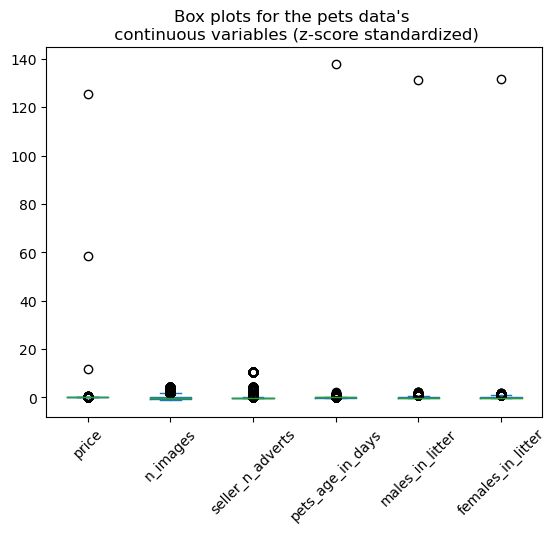

In [9]:
# z-score scaling the data
sats_zscaled = pd.DataFrame(stats.zscore(pets_df[continuous_vars]))

# adding column names to sats_zscaled
sats_zscaled.columns = continuous_vars

# plotting sats_zscaled
sats_zscaled.plot(kind='box', title = "Box plots for the pets data's \n continuous variables (z-score standardized)");
plt.xticks(rotation = 45);

In [10]:
# filtering out rows with zscaled > 20
# There is absolutely a better way to do this, but I'm too tired to figure it out right now
less_than_20 = sats_zscaled < 20
pets_df = pets_df[less_than_20['price'] & less_than_20['pets_age_in_days'] & less_than_20['males_in_litter'] & less_than_20['females_in_litter']]

# removing listings with a price of 0
pets_df = pets_df[pets_df['price'] > 0]

Below are the repeated .describe() and z-scaled box plot.
 - Both show that the price column still has some extreme outliers. The outlier cutoff will need to be reduced further.
 - The max value in the pets_age_in_days column is very large (roughly 31 years old), but not unplausible for some horses, fish, reptiles and birds. I will look at this row individually to check it's legitimacy.
 - The values for fe/males in litter are large, but not impossible. According to Pets4Homes "Litters of over eight pups are considered to be large, and over ten is rare, although up to seventeen live births have been recorded in some cases!" (https://www.pets4homes.co.uk/pet-advice/factors-that-determine-the-size-of-a-litter.html). Of course, the actual litter size must be the sum of the two columns. I will calculate this and remove any rows with a combined total greater than 12 (this is a somewhat arbitary cut off informed by the above information).

In [11]:
pets_df[continuous_vars].describe()

price             n_images     seller_n_adverts  \
count            18,929.00            18,929.00            18,929.00   
mean                879.42                 8.77                 4.10   
std              14,757.69                 7.52                12.88   
min                   0.20                 1.00                 1.00   
25%                  80.00                 4.00                 1.00   
50%                 550.00                 6.00                 2.00   
75%               1,000.00                11.00                 3.00   
max           2,000,000.00                41.00               140.00   

          pets_age_in_days      males_in_litter    females_in_litter  
count            18,929.00            18,929.00            18,929.00  
mean                289.30                 1.13                 1.08  
std                 575.49                 1.63                 1.58  
min                   0.00                 0.00                 0.00  
25%                  55.00                 0.00                 0.00  
50%                  93.00                 0.00                 0.00  
75%                 252.50                 2.00                 2.00  
max              11,315.00                13.00                10.00

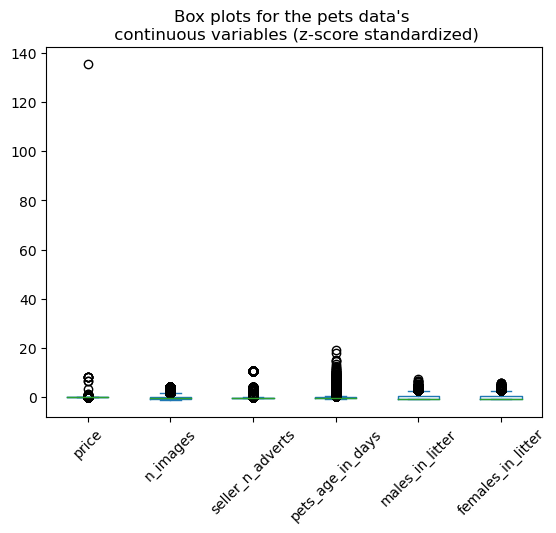

In [12]:
# z-score scaling the data
sats_zscaled = pd.DataFrame(stats.zscore(pets_df[continuous_vars]))

# adding column names to sats_zscaled
sats_zscaled.columns = continuous_vars

# plotting sats_zscaled
sats_zscaled.plot(kind='box', title = "Box plots for the pets data's \n continuous variables (z-score standardized)");
plt.xticks(rotation = 45);

In [13]:
# through visual inspection, I found a number of listings where the advertiser simply entered 12345 (etc.) as
# the price. I am assuming these are not legitimate prices and so will use this as a cutoff.
pets_df = pets_df[pets_df['price'] < 12345]

# I'm also going to drop ads where the price is 1234, as I suspect these are also illegitimate
pets_df = pets_df[pets_df['price'] != 1234]

In [14]:
# the previous cell removed the row with the greatest age, I'm now looking at the top 20 eldest animals to 
# gauge if futher cleaning is needed.
pets_df.sort_values('pets_age_in_days', ascending = False).head(20)

# all animals in the top 20 are either horses, fish or birds, some species of which can live up to or beyond
# 30 years (e.g. koi karp, parrots). These can be left as they are, with the exception of the listing with the
# greatest age, which is for infant axolotls (amphibians, but classes as fish by Pets4Homes). I'll drop this.
pets_df = pets_df[pets_df['advert_id'] != 'mNSQZ7OOl']

There may be other rows like the one I just removed, but due to the large range between the lifespans of the various animal types, they are difficult to detect. I considered searching the descriptions for keywords indicating that an animal is younger than it's listed name (e.g. 'baby', 'puppy'), but these could potentially pick up ads where people are using these terms as pet names (both literally and figuratively). Instead, I will rely on domain knowlegde to set some age caps for the categories who's breeds have more similar age ranges.

In [15]:
# The longest living rodent people keep as pets is the chinchilla, with a max life expectancy of 20 years
pets_df.drop(pets_df[(pets_df['category'] == "Rodents") & (pets_df['pets_age_in_days'] > 365*20)].index, inplace = True)

# It is very uncommon for cats to live longer than 20 years
pets_df.drop(pets_df[(pets_df['category'] == "Cats") & (pets_df['pets_age_in_days'] > 365*20)].index, inplace = True)

# it is very uncommon for dogs to live longer than 18 years
pets_df.drop(pets_df[(pets_df['category'] == "Dogs") & (pets_df['pets_age_in_days'] > 365*18)].index, inplace = True)

# it is very uncommon for rabbits to live longer than 14 years
pets_df.drop(pets_df[(pets_df['category'] == "Rabbits") & (pets_df['pets_age_in_days'] > 365*14)].index, inplace = True)


In [16]:
# removing any rows with a total litter size > 12
litter_size = pets_df['males_in_litter'] + pets_df['females_in_litter']
litter_size = litter_size <= 12
pets_df = pets_df[litter_size]

Below are the 3rd and final set of .describe() and z-scaled box plots for the continuous variables, with outliers removed. All of these variables have many values beyond the IQR * 1.5 range, but as they all have a strong right skew and the values are fairly continually distributed through these upper ranges, I am happy to leave these values in.

 -  **Price** - This will be my target variable. There is a very large range for price, from 20p up to £11,500. This is likely due to the very different animal categories in the dataset. As such, it will be worth taking a further look at the distribution of prices amongs the individual animal categories. As both the box plot and mean (£710.45) and mode (£550) show, price has a strong right skew.
 - **n_images** - All listings have at least 1 image. The listing with the most has 41. There is a slight right skew (mean 8.76, mode 6).
 - **seller_n_adverts** - A significant proportion of the adverts are listed by a seller with only one advert, although the majority are listed by sellers with two or more (mode 2). Although the max value is orders of magnitude larger than even the 75th percentile, I have decided to keep this range for reasons discussed above.
 - **pet_age_in_days** - Similarly to price, this variable has a very strong right skew. Values range from newborn (i.e. 0 days) to 25 years (9125 days). An individual breakdown by animal category is needed.
 - **fe/males_in__litter** - These columns show a strong right skew, but this is due to the large number of 0s for animals where this value is either not applicable or unlisted. I'll look at these distribution with histograms.

In [17]:
9125/365

25.0

In [18]:
pets_df[continuous_vars].describe()

price             n_images     seller_n_adverts  \
count            18,848.00            18,848.00            18,848.00   
mean                710.45                 8.76                 4.10   
std                 755.22                 7.51                12.90   
min                   0.20                 1.00                 1.00   
25%                  80.00                 4.00                 1.00   
50%                 550.00                 6.00                 2.00   
75%               1,000.00                11.00                 3.00   
max              11,500.00                41.00               140.00   

          pets_age_in_days      males_in_litter    females_in_litter  
count            18,848.00            18,848.00            18,848.00  
mean                288.39                 1.12                 1.07  
std                 564.46                 1.61                 1.55  
min                   0.00                 0.00                 0.00  
25%                  55.00                 0.00                 0.00  
50%                  93.00                 0.00                 0.00  
75%                 253.50                 2.00                 2.00  
max               9,125.00                12.00                10.00

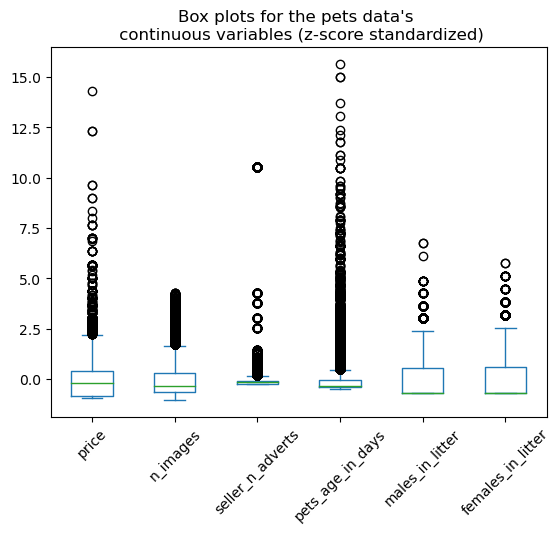

In [19]:
# z-score scaling the data
sats_zscaled = pd.DataFrame(stats.zscore(pets_df[continuous_vars]))

# adding column names to sats_zscaled
sats_zscaled.columns = continuous_vars

# plotting sats_zscaled
sats_zscaled.plot(kind='box', title = "Box plots for the pets data's \n continuous variables (z-score standardized)");
plt.xticks(rotation = 45);

In order to take a deeper look at the continuous variables as discussed in the previous textbox, I've created a number of histograms below. Each set of histograms has a summary in the textbox above it.

**Histograms showing the distribution of price by animal category**
All of the histograms for pet prices subsetted by pet category still show a strong right skew. However, the ranges between animal types varies greatly. For instance, the price range for invertibrates maxes out at around £250, where as the price range for horses maxes out at around £7000. Clearly, category will be an important predictor for price.

The categories with the least extreme right skew are dogs, cats and horses. These are also the categories with the largest maximum prices. This suggests that the outlier removal I have done so far has had little impact on the animal types with narrower price ranges. Given the extent of the skew for these categories, I have decided to perform futher outlier removal on them. Specifically, based on the z-scaled box plot below the histograms, I will remove values for than 8 standard deviations from the mean of each category. This will remove some of the most extreme and suspicious outliers whilst keeping the main distributions in tact.

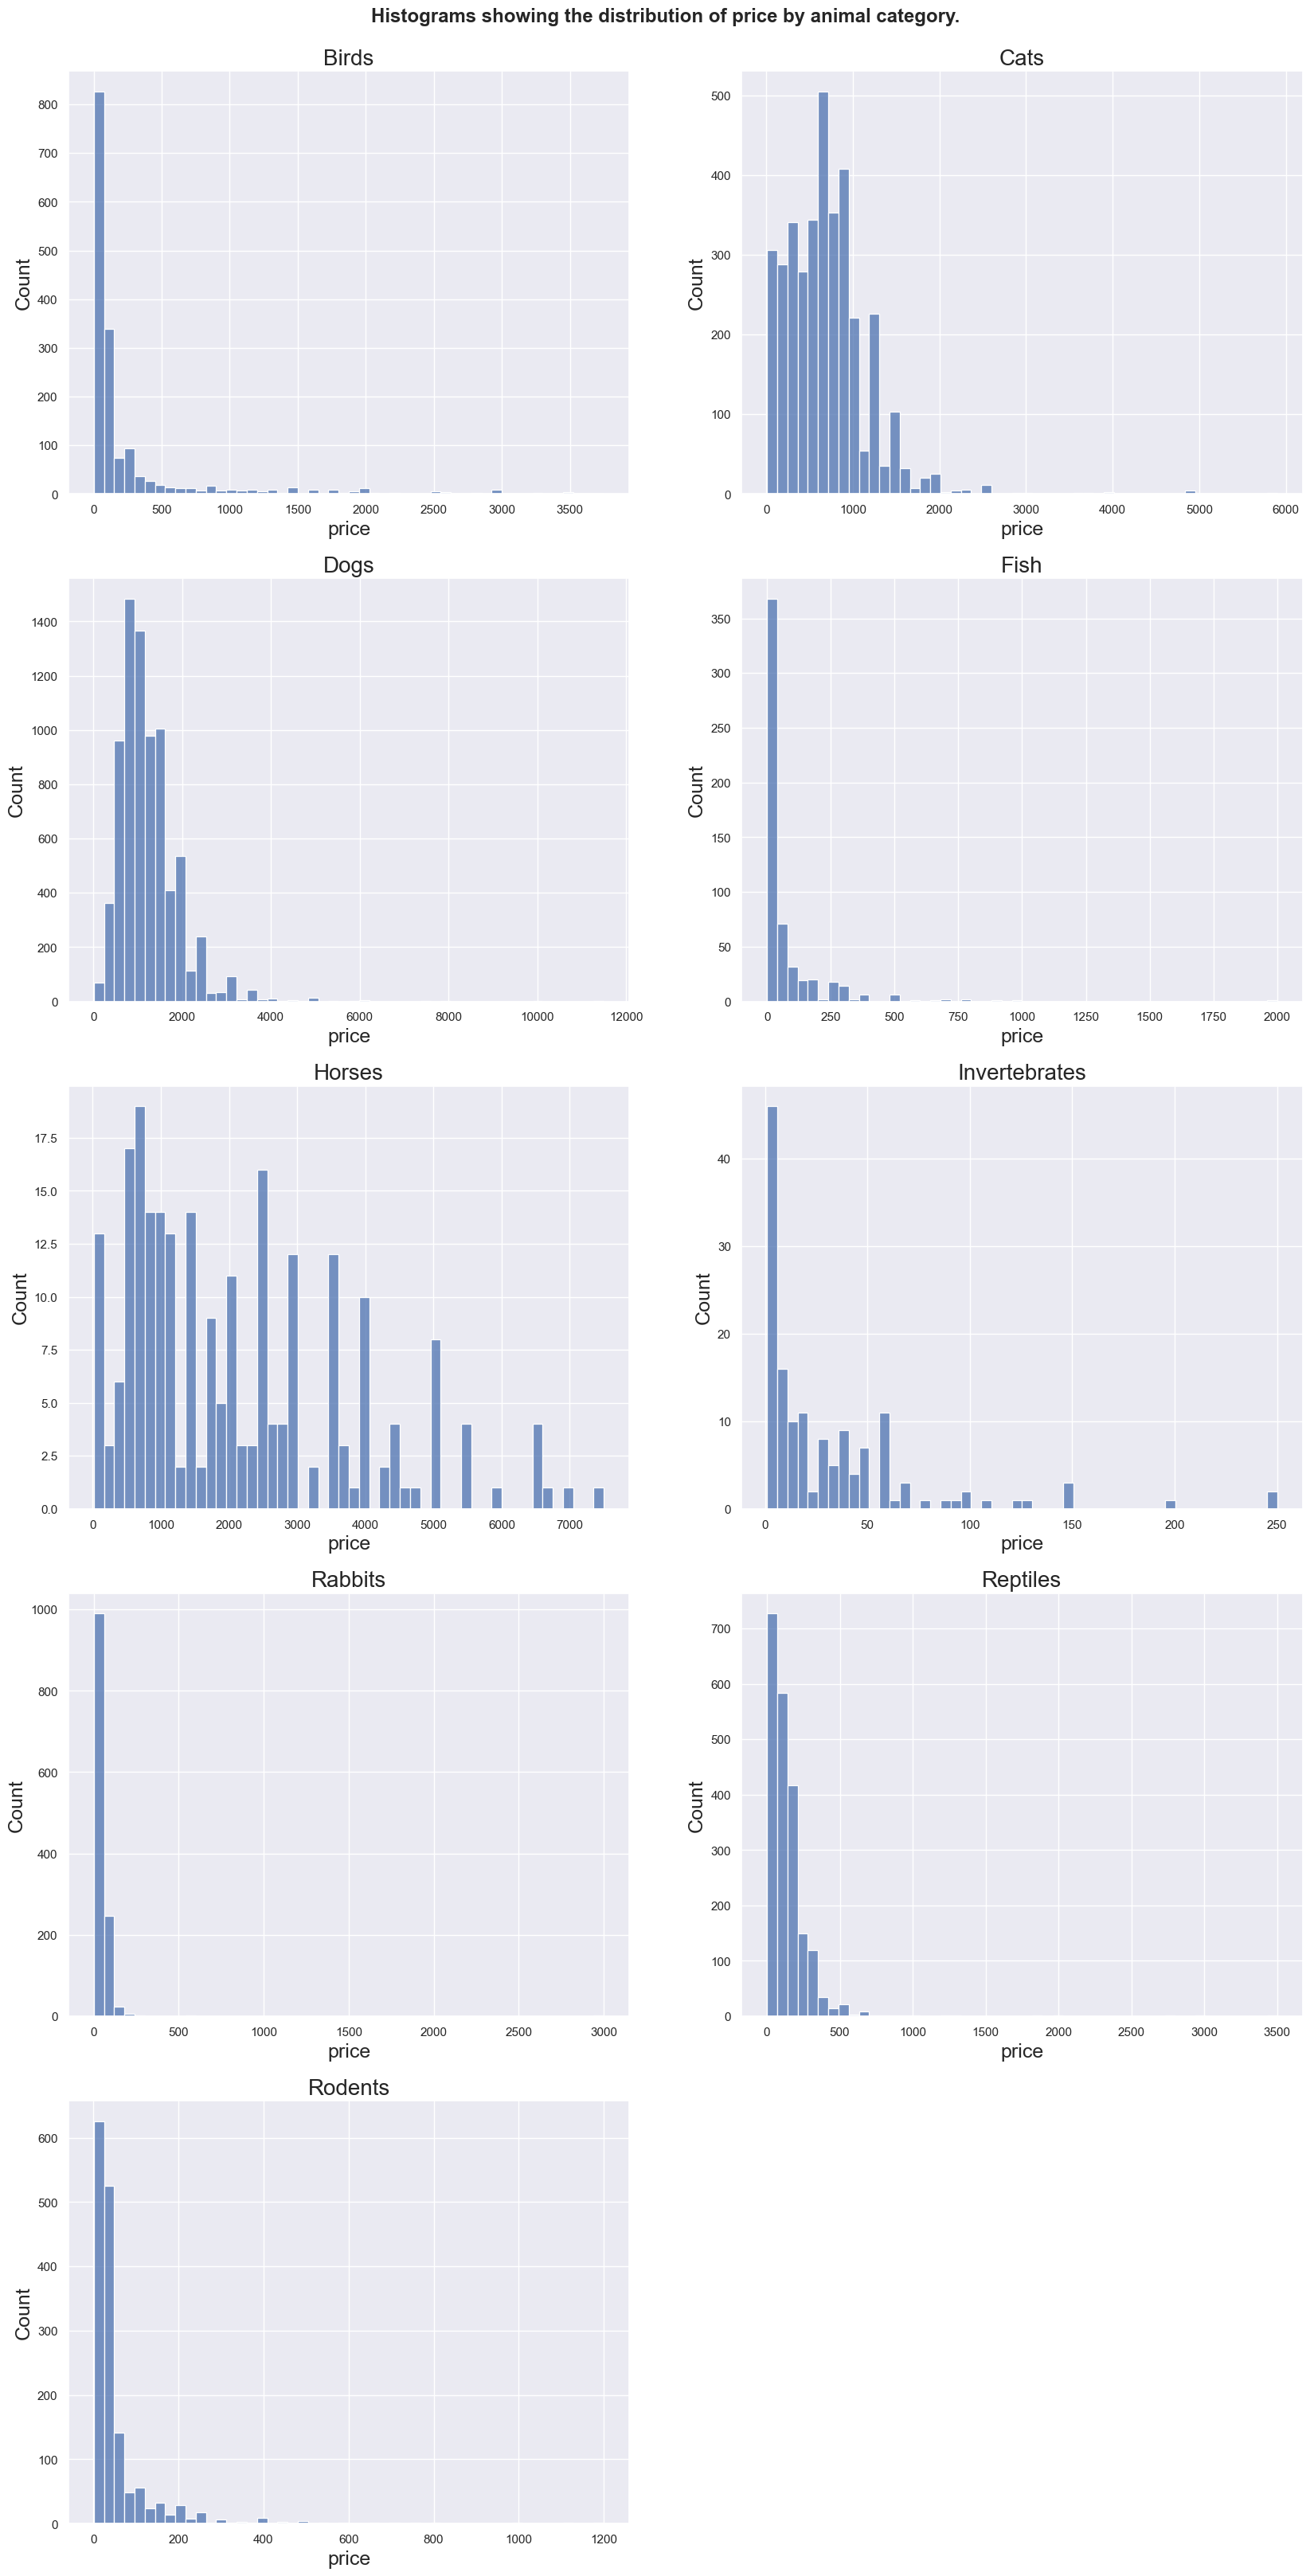

In [20]:
# setting label sizes
sns.set(rc = {'axes.labelsize' : 18 })

fig, ax = plt.subplots(5,2,figsize=(20,40))
fig.delaxes(ax[4,1])

# setting fig title
fig.suptitle("Histograms showing the distribution of price by animal category." ,
             fontsize = 'x-large', 
             fontweight = 'bold',
             y=.9);

# generating histograms
plot_row = 0
plot_col = 0

for i in range(0, len(pets_df['category'].unique()), 2):
    
    sns.histplot(pets_df[pets_df['category'] == pets_df['category'].unique()[i]]['price'],
                 bins = 50,
                 ax=ax[plot_row, plot_col]).set_title(pets_df['category'].unique()[i], size = 20)
    plot_col +=1
    
    if i+1 < 9:
        sns.histplot(pets_df[pets_df['category'] == pets_df['category'].unique()[i+1]]['price'],
                     bins = 50,
                     ax=ax[plot_row, plot_col]).set_title(pets_df['category'].unique()[i+1], size = 20)
    plot_col = 0
    plot_row += 1

/Users/lewis/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lewis/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lewis/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/

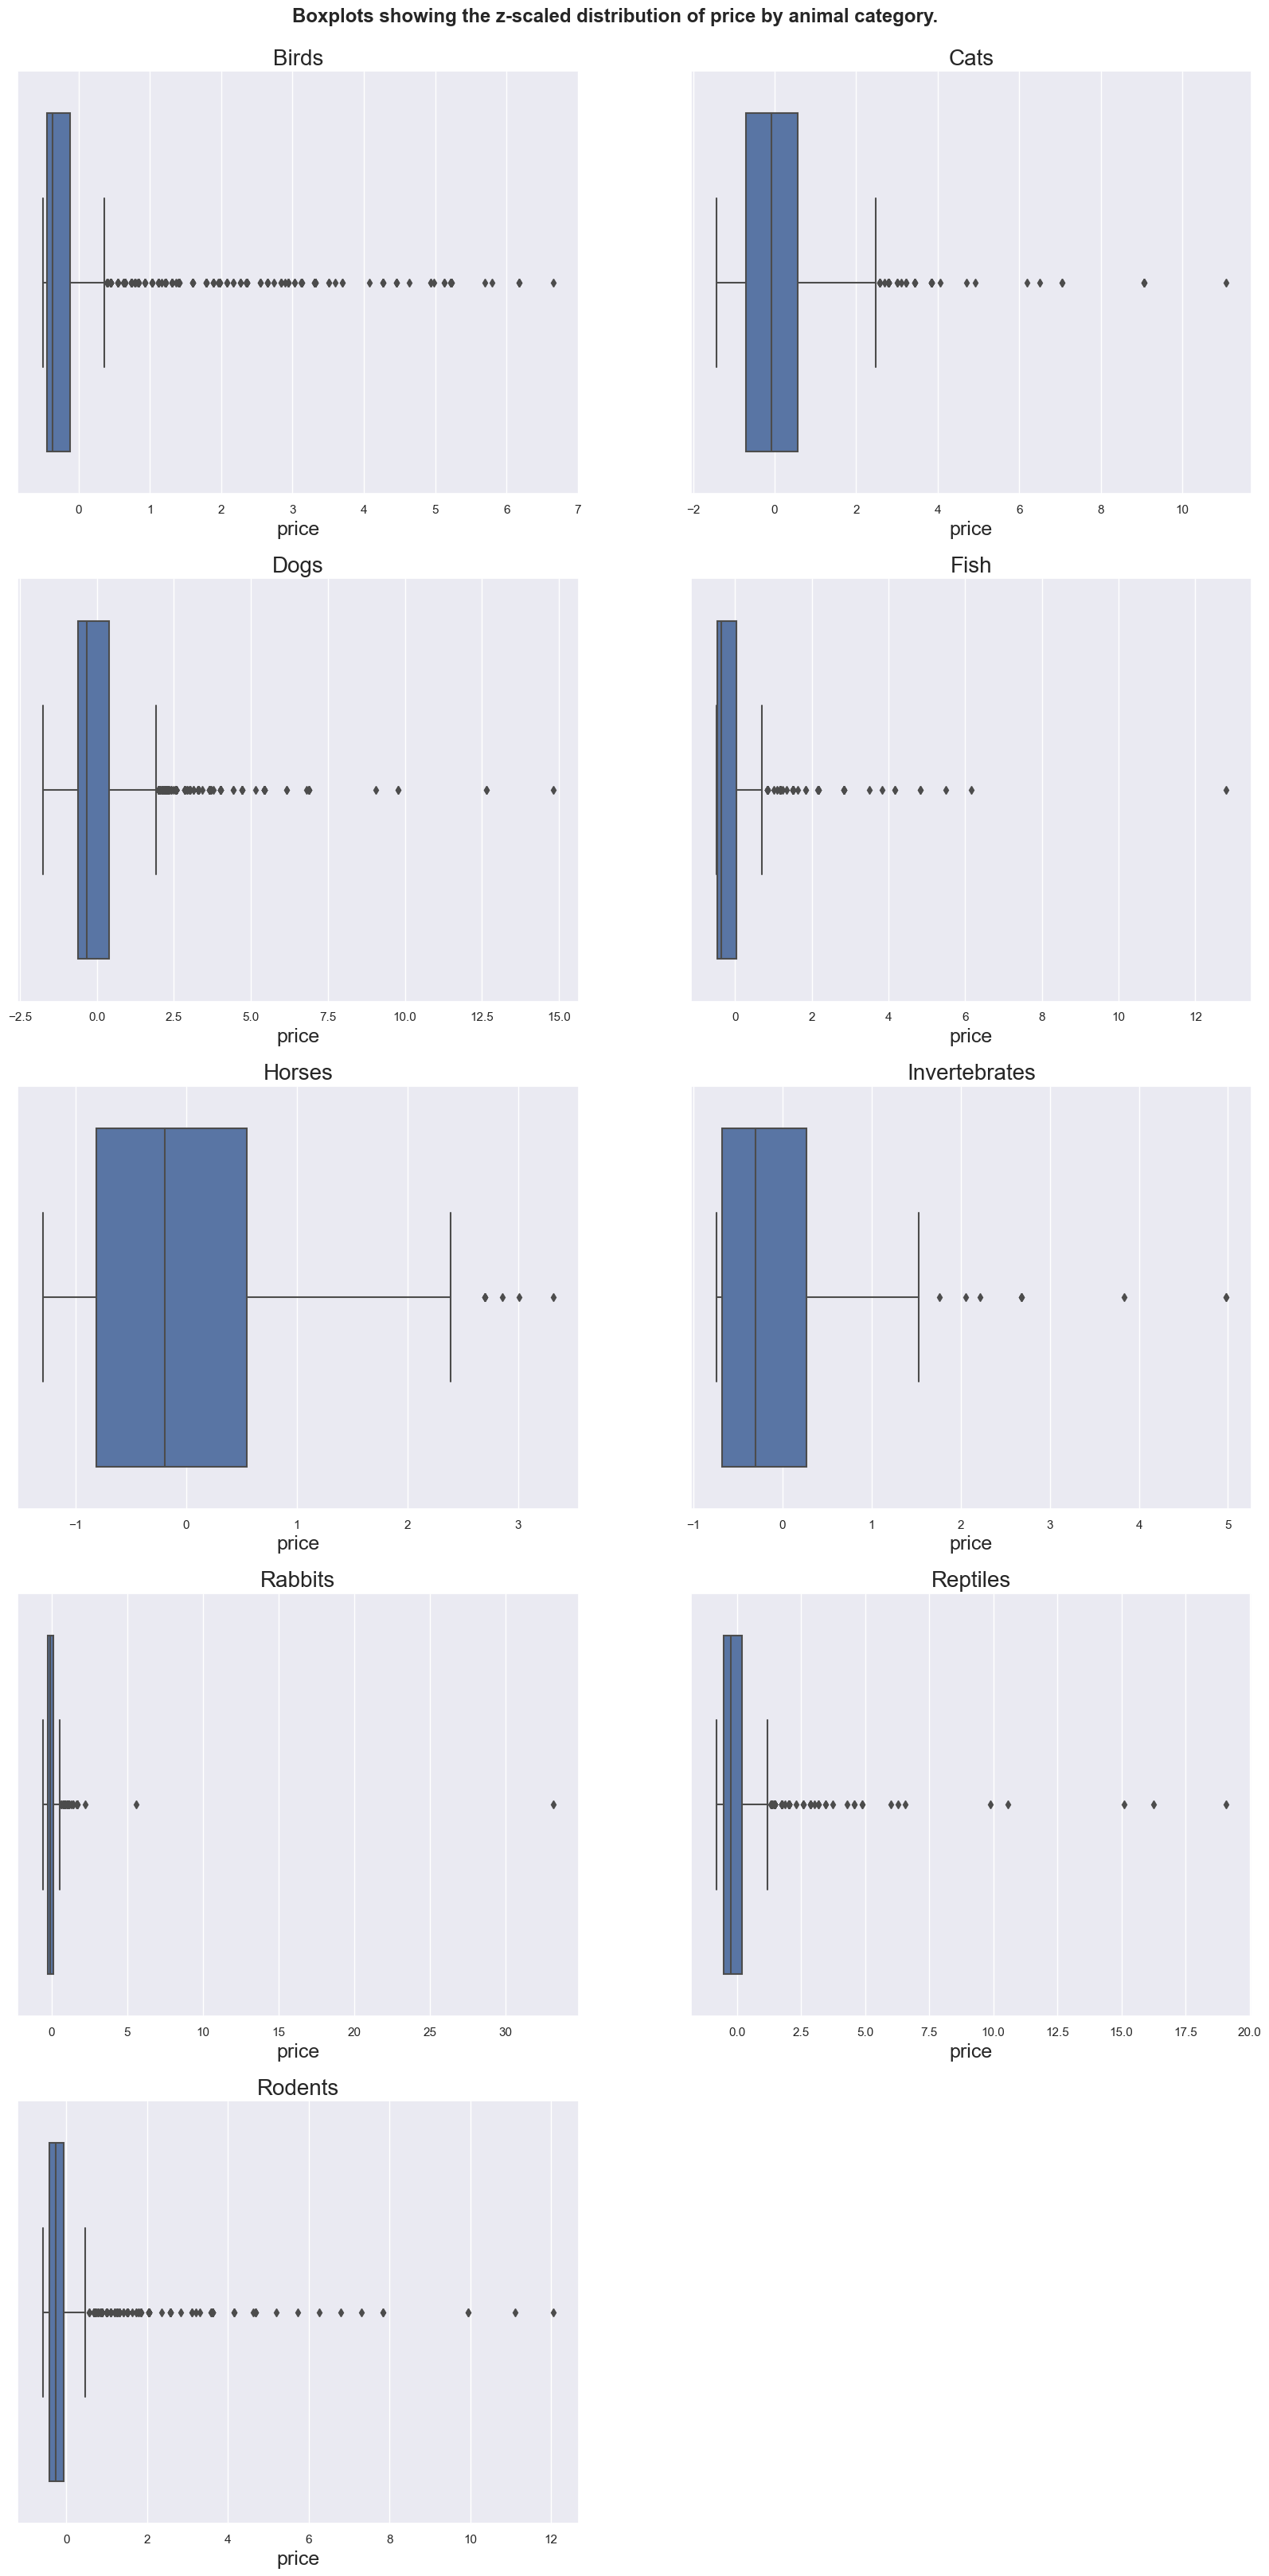

In [46]:
# setting label sizes
sns.set(rc = {'axes.labelsize' : 18 })

fig, ax = plt.subplots(5,2,figsize=(20,40))
fig.delaxes(ax[4,1])

# setting fig title
fig.suptitle("Boxplots showing the z-scaled distribution of price by animal category." ,
             fontsize = 'x-large', 
             fontweight = 'bold',
             y=.9);

# generating histograms
plot_row = 0
plot_col = 0

for i in range(0, len(pets_df['category'].unique()), 2):
    
    sns.boxplot(stats.zscore(pets_df[pets_df['category'] == pets_df['category'].unique()[i]]['price']),
               ax=ax[plot_row, plot_col]).set_title(pets_df['category'].unique()[i], size = 20)
    plot_col +=1
    
    if i+1 < 9:
        sns.boxplot(stats.zscore(pets_df[pets_df['category'] == pets_df['category'].unique()[i+1]]['price']),
                   ax=ax[plot_row, plot_col]).set_title(pets_df['category'].unique()[i+1], size = 20)
    plot_col = 0
    plot_row += 1

**PROBLEM** I've said above that I will remove instances more than 8 stds from the mean, but that would be the mean for each individual category. Is that legit? That would be defining an outlier based on a combination of features, rather than just price. Check with Ed before you do this.

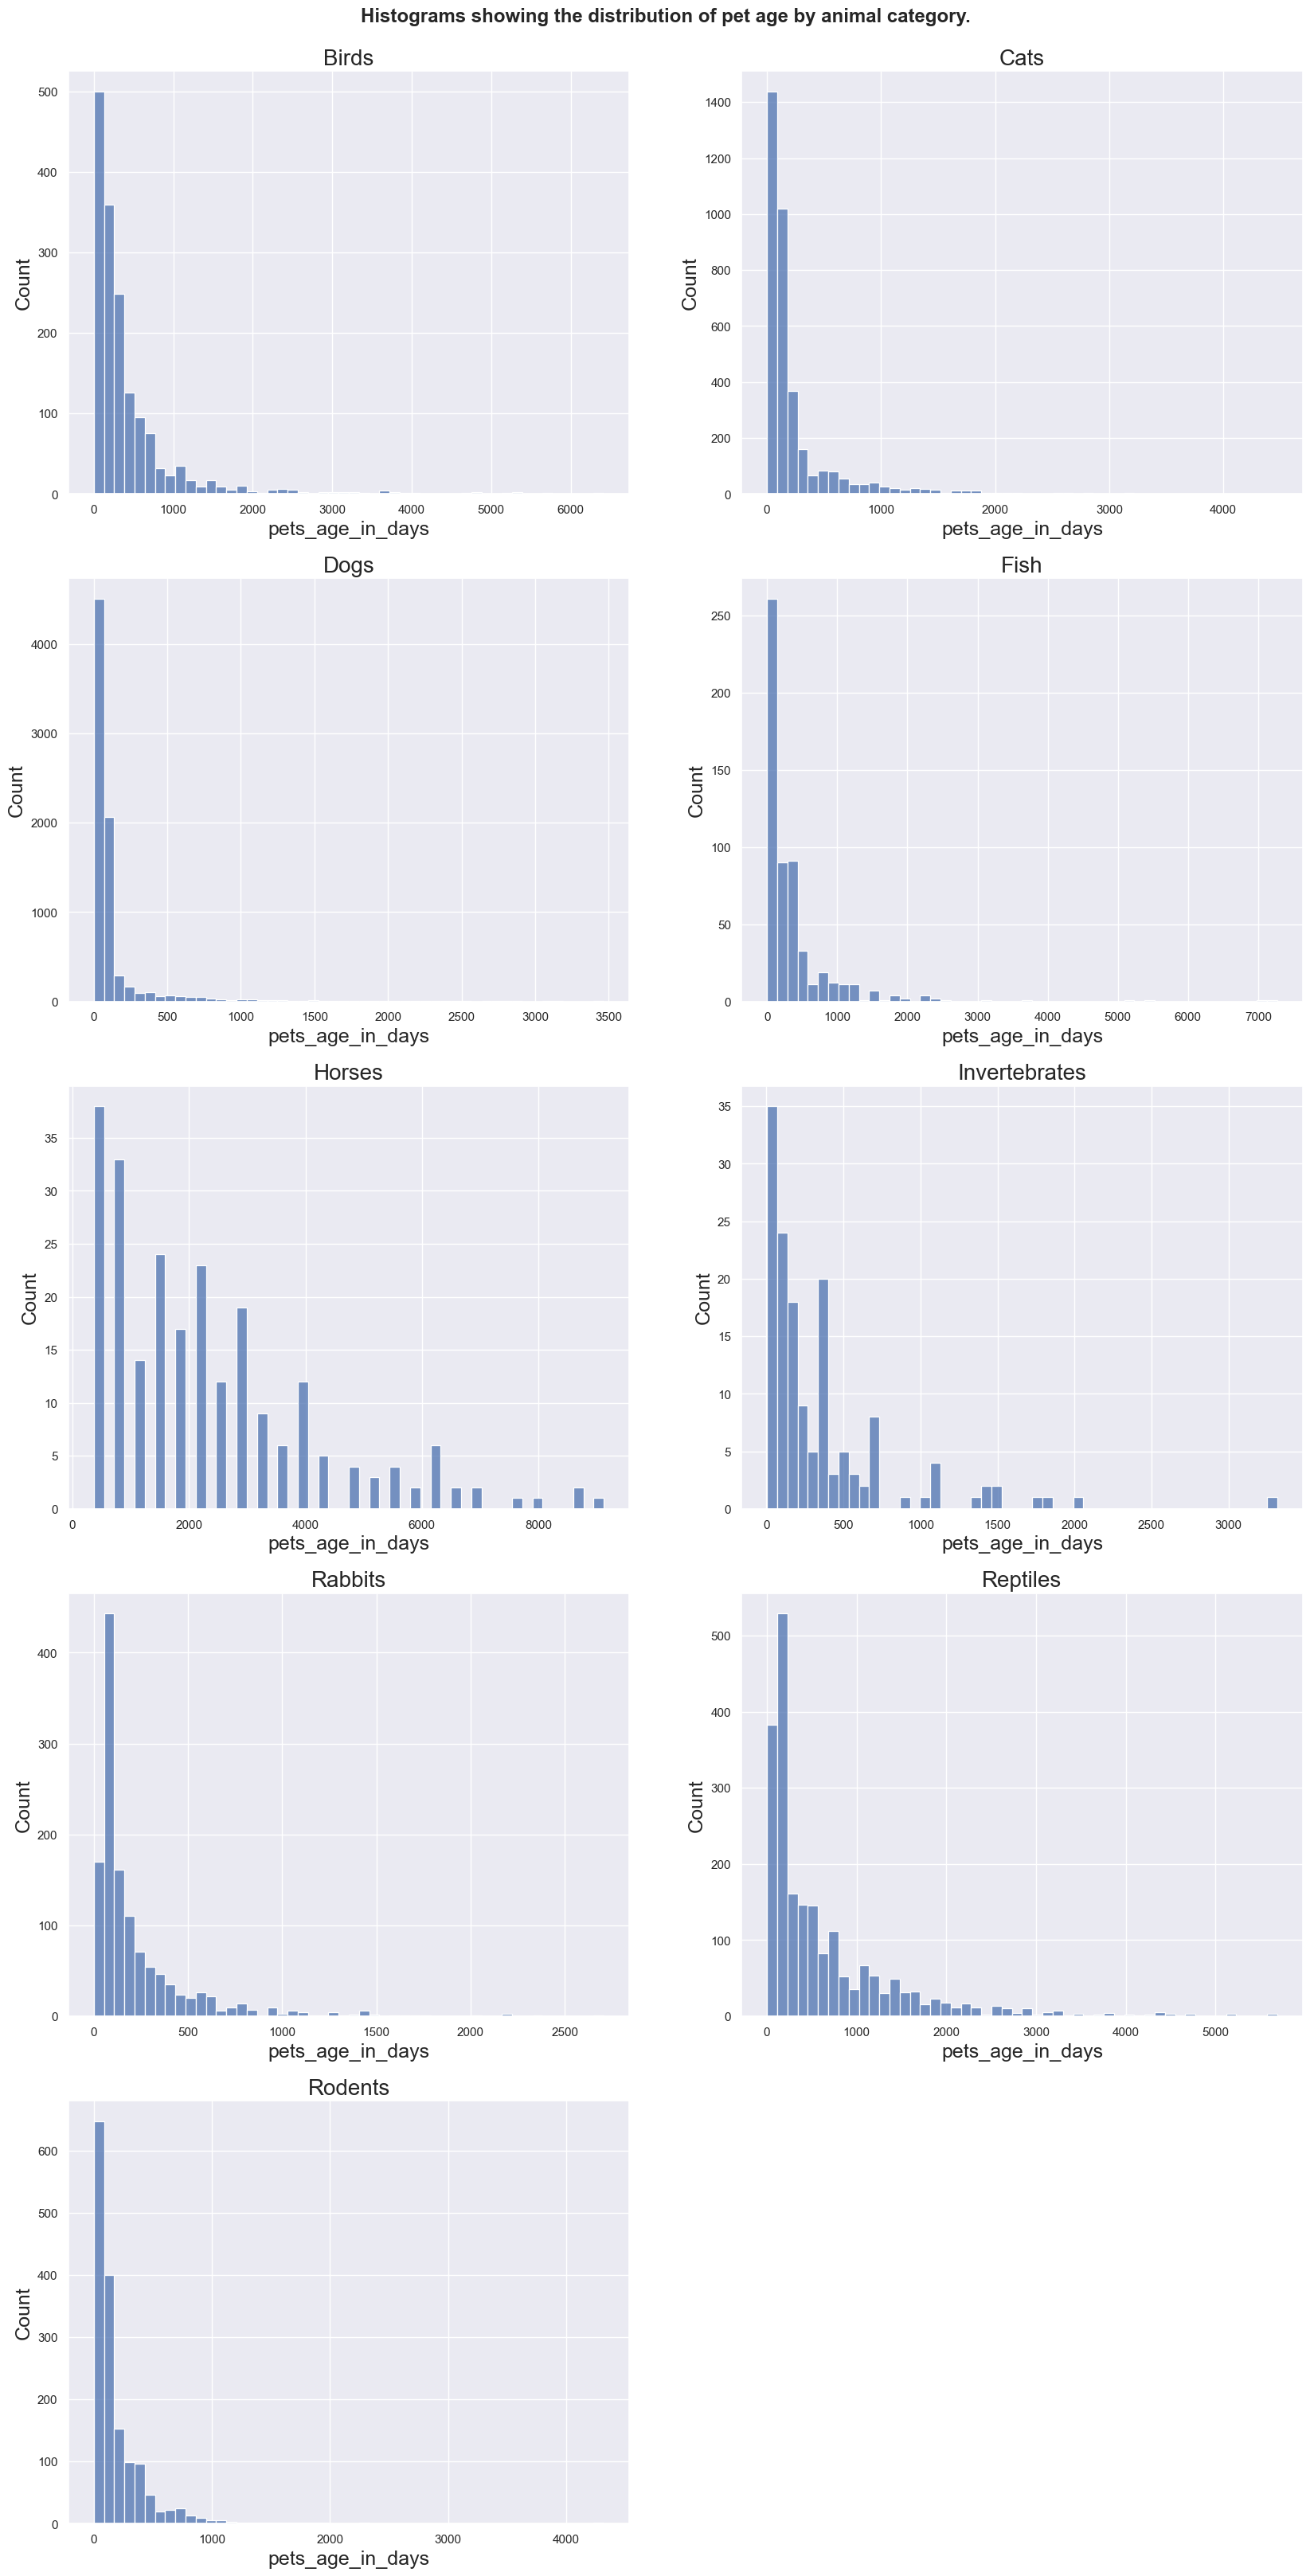

In [48]:
# setting label sizes
sns.set(rc = {'axes.labelsize' : 18 })

fig, ax = plt.subplots(5,2,figsize=(20,40))
fig.delaxes(ax[4,1])

# setting fig title
fig.suptitle("Histograms showing the distribution of pet age by animal category." ,
             fontsize = 'x-large', 
             fontweight = 'bold',
             y=.9);

# generating histograms
plot_row = 0
plot_col = 0

for i in range(0, len(pets_df['category'].unique()), 2):
    
    sns.histplot(pets_df[pets_df['category'] == pets_df['category'].unique()[i]]['pets_age_in_days'],
                 bins = 50,
                 ax=ax[plot_row, plot_col]).set_title(pets_df['category'].unique()[i], size = 20)
    plot_col +=1
    
    if i+1 < 9:
        sns.histplot(pets_df[pets_df['category'] == pets_df['category'].unique()[i+1]]['pets_age_in_days'],
                     bins = 50,
                     ax=ax[plot_row, plot_col]).set_title(pets_df['category'].unique()[i+1], size = 20)
    plot_col = 0
    plot_row += 1

The histograms below show the number of female and male puppies or kittens in a litter. These look as should bb expected - they slowly slope off as the number of animals increases. Notably, for all but female kittens, the most common value is 0. These will be dog or cat listings where these variables were unlisted. For some of these, the seller will have failed to list the litter size, whereas for others the animals on sale will be adults. It may be worthwhile creating an interaction feature between pet_age_in_days and these two variables to capture this relationship.

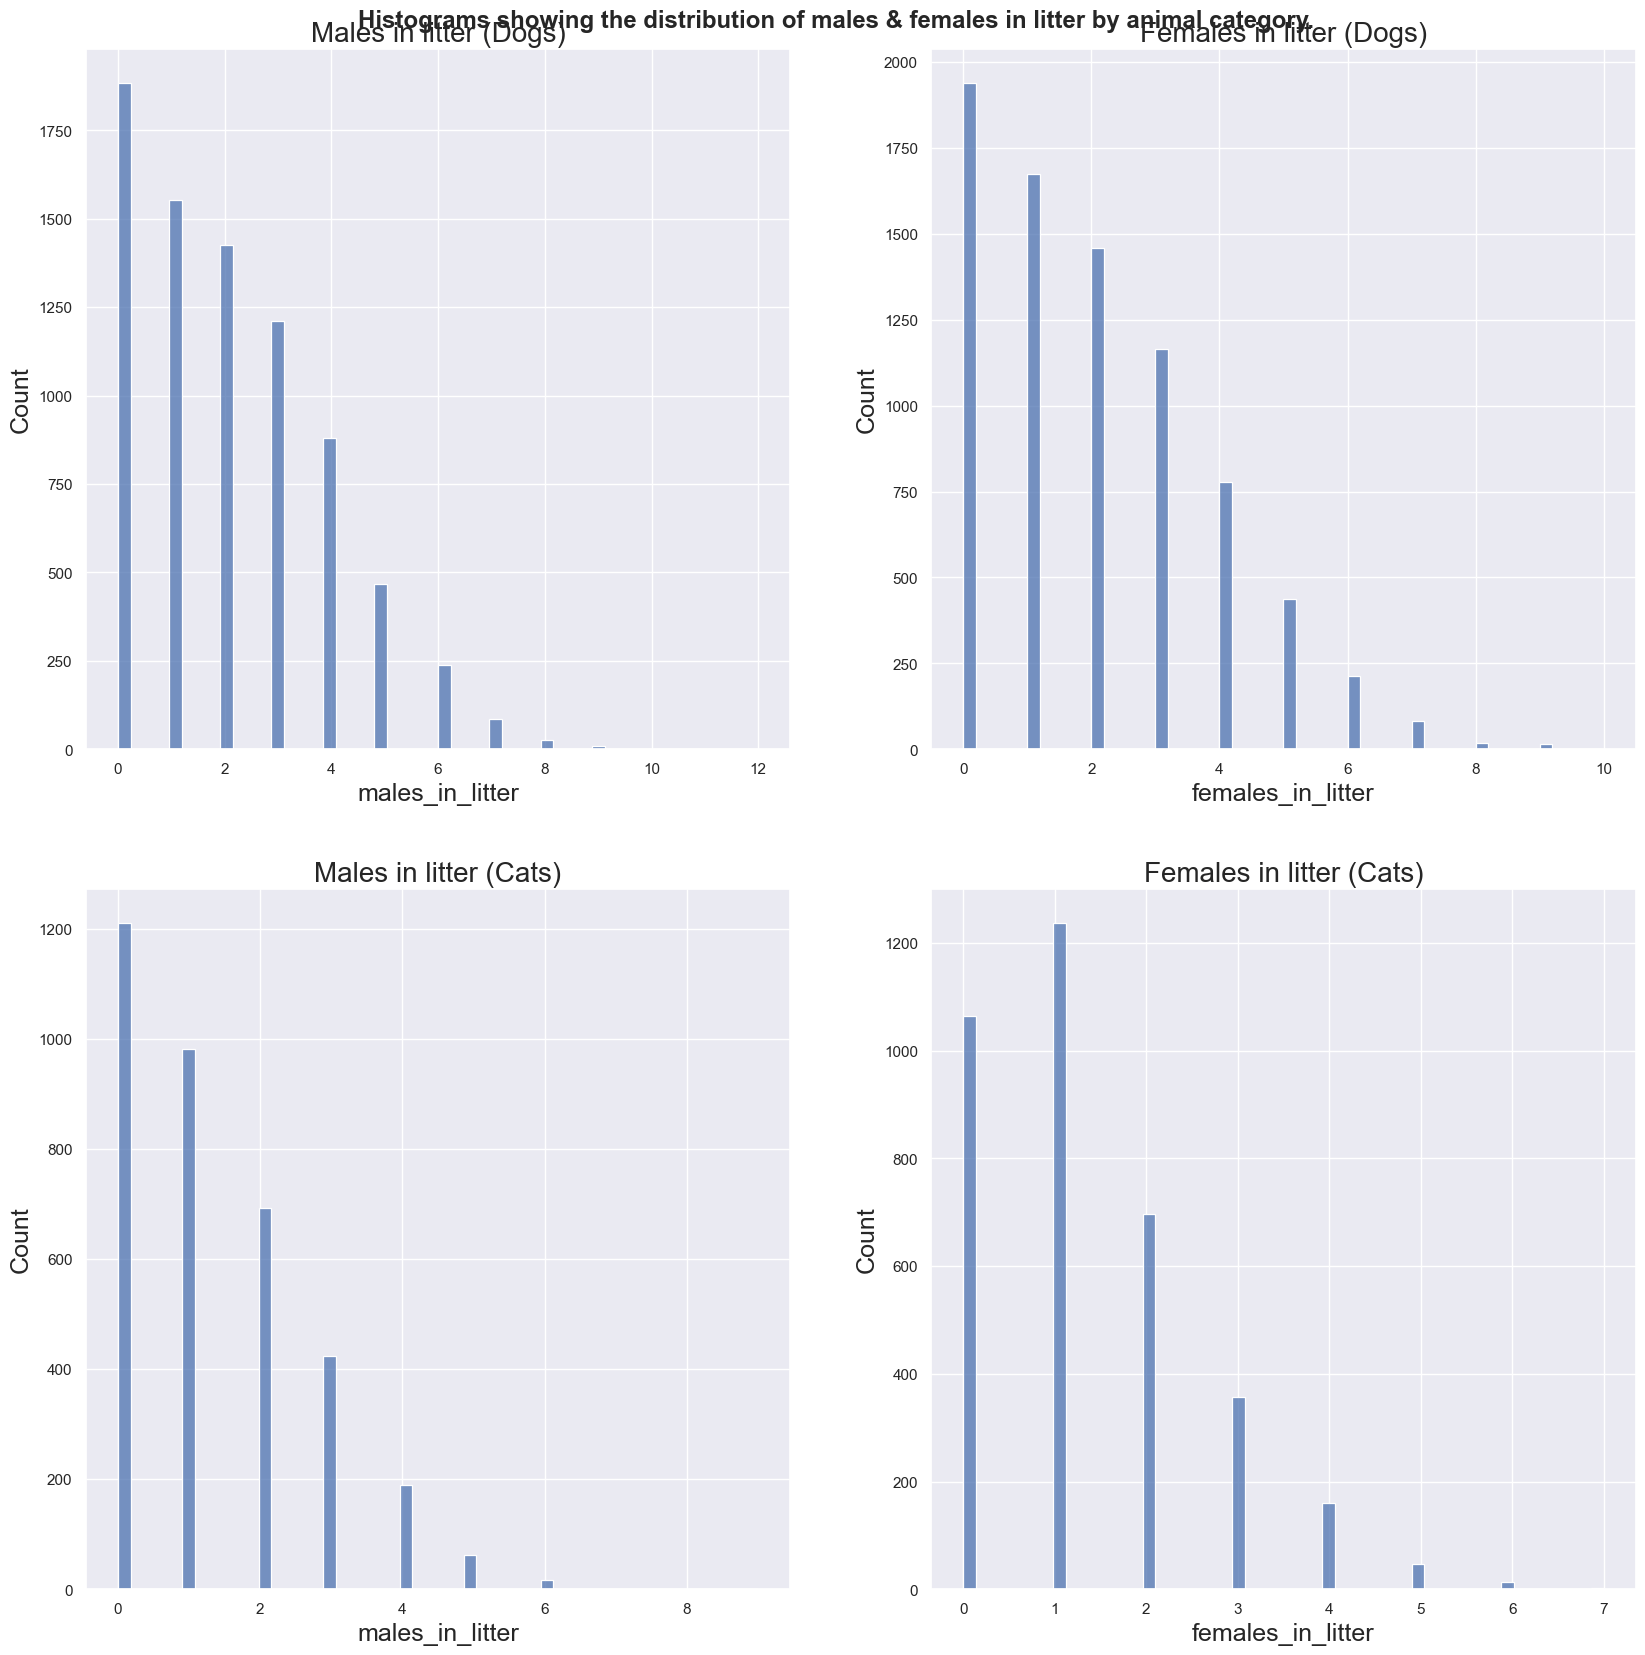

In [49]:
# setting label sizes
sns.set(rc = {'axes.labelsize' : 18 })

fig, ax = plt.subplots(2,2,figsize=(20,20))

# setting fig title
fig.suptitle("Histograms showing the distribution of males & females in litter by animal category." ,
             fontsize = 'x-large', 
             fontweight = 'bold',
             y=.9);

# generating histograms
plot_row = 0
plot_col = 0

sns.histplot(pets_df[pets_df['category'] == 'Dogs']['males_in_litter'],
                 bins = 50,
                 ax=ax[0, 0]).set_title('Males in litter (Dogs)', size = 20);

sns.histplot(pets_df[pets_df['category'] == 'Dogs']['females_in_litter'],
                 bins = 50,
                 ax=ax[0, 1]).set_title('Females in litter (Dogs)', size = 20);

sns.histplot(pets_df[pets_df['category'] == 'Cats']['males_in_litter'],
                 bins = 50,
                 ax=ax[1, 0]).set_title('Males in litter (Cats)', size = 20);

sns.histplot(pets_df[pets_df['category'] == 'Cats']['females_in_litter'],
                 bins = 50,
                 ax=ax[1, 1]).set_title('Females in litter (Cats)', size = 20);

## Binary variables

In [ ]:
binary_vars_with_NAs

Both the title and description columns contain raw text. These will need to be processed before any analysis can be done on them.